### Database for ML

Linn Alexandra Emhjellen. 2021

In [1]:
import numpy as np
import pandas as pd
import os
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
# rockfall pixels from source area polygons with GIS-features
df_rockfall_Laerdal_Aurland = pd.read_excel('Laerdal_Aurland_rockfall_pixels_features.xlsx')

# random pixels from Lærdal and Aurland with GIS-features
df_random_Laerdal_Aurland = pd.read_excel('Laerdal_Aurland_random_pixels_features.xlsx')
df_random_Laerdal_Aurland = df_random_Laerdal_Aurland.drop_duplicates(keep='first')

# random pixels from Vestland with GIS-features. For validation at the end
df_random_Vestland = pd.read_excel('Vestland_random_pixels_features.xlsx')

In [3]:
# making new column ''ReleaseArea'' and giving binary values
df_rockfall_Laerdal_Aurland['ReleaseArea'] = 1
df_random_Laerdal_Aurland['ReleaseArea'] = 0

In [4]:
# selecting 30 000 random (approximately 2x rockfall pixels) rows of the random pixels df
df_random_Laerdal_Aurland = df_random_Laerdal_Aurland.sample(n = 30000)

In [5]:
# merging rockfall and random pixels with features into one dataframe

ML_database = pd.concat([df_rockfall_Laerdal_Aurland, df_random_Laerdal_Aurland], axis=0)

ML_database.drop(['CID', 'pointid','grid_code'], inplace=True, axis=1)

In [6]:
# clean data for NaN
ML_database = ML_database.dropna()

In [7]:
#ML_database

In [8]:
# encode bedrock values

bedrock = ML_database[["Bedrock"]]

bedrock_encoder = OneHotEncoder()
bedrock_encoded = bedrock_encoder.fit_transform(bedrock)

bedrock = bedrock_encoded.toarray()
bedrock_encoder.categories_

[array([102., 103., 108., 109., 113., 136., 140., 143., 202., 402., 405.,
        420., 423., 424., 426., 429., 430., 432., 434., 437., 442., 452.,
        454.])]

In [9]:
bedrock_Vestland = ['Granite','Granodiorite','Tonalite','Trondhjemite','Syenite','Monzonite','Monzodiorite','Quartz diorite','Diorite','Gabbro','Norite','Peridotite','Pyroksenite','Charnockite','Mangerite','Anorthosite','Mafic dyke (Diabase, Dolerite)','Pegmatite/aplite','Felsic volcanic rock','Rhyolite','Dacite','Intermediate volcanic rock','Andesite','Mafic volcanic rock','Basalt',
                  'Pyroclastic rock','Volcanic breccia','Siltstone','Sandstone','Greywacke','Arkose','Konglomerate','Sedimentary breccia','Limestone','Tuffite','Shale','Phyllite','Mica schist','Garnet mica schist','Calcareous phyllite','Calcareous mica schist','Amphibole schist','Graphitic schist','Calcite marble',
                 'Metasandstone','Metagreywacke','Meta-arkose','Quartzite','Quartz schist','Mica gneiss','Calc-silicate rock','Amphibole gneiss','Granitic gneiss','Granodioritic gneiss','Tonalitic gneiss','Quartz dioritic gneiss','Monzonitic gneiss','Dioritic gneis','Orthopyroxene gneiss','Migmatite','Augengneiss',
                    'Banded gneiss','Greenschist','Greenstone','Amphibolite','Metagabbro','Eclogite','Serpentinite','Mylonite/Phyllonite','Cataclasite']



In [11]:
# sorted same as array 
bedrock_groups = ['Granit','Granodiorite','Monzonite','Monzodiorite', 'Gabbro','Pyroksenite','Charnockite','Anorthosite','Rhyolite','Phyllite','Calcareous phyllite','Metasandstone', 'Quartzite','Quartz schist','Mica gneiss','Amphibole gneiss','Granitic gneiss','Tonalitic gneiss','Monzonitic gneiss','Orthopyroxene gneiss','Banded gneiss','Amphibolite','Metagabbro']

In [12]:
other_bedrocks = np.setdiff1d(bedrock_Vestland,bedrock_groups)

array = np.zeros([len(ML_database),len(other_bedrocks)])

In [14]:
df_other_bedrocks = pd.DataFrame(array, columns = other_bedrocks)

In [15]:
df_bedrock = pd.DataFrame(bedrock, columns=bedrock_groups)

In [16]:
# merging the one-hot-encoded bedrock dataframe to the other parameters
ML_database = ML_database.reset_index()   #Need to do this, don't know why indexes was changed.
ML_database = pd.concat([ML_database, df_bedrock], axis=1)

ML_database = pd.concat([ML_database, df_other_bedrocks], axis=1)

In [18]:
aspect_categorical = []

for i in ML_database['Aspect']:
    if (i == -1):
        aspect_categorical.append('Flat')
    elif (i<= 22.5) & (i >= 0) or (i>= 337.5) & (i < 360):
        aspect_categorical.append('North')
    elif (i<= 67.5) & (i > 22.5):
        aspect_categorical.append('North East')
    elif (i<= 112.5) & (i > 67.5):
        aspect_categorical.append('East')
    elif (i <= 157.5) & (i > 112.5):
        aspect_categorical.append('South East')
    elif (i <= 202.5) & (i > 157.5):
        aspect_categorical.append('South')
    elif (i<= 247.5) & (i > 202.5):
        aspect_categorical.append('South West')
    elif (i<= 292.5) & (i > 247.5):
        aspect_categorical.append('West')
    elif (i<= 337.5) & (i > 292.5):
        aspect_categorical.append('North West')
    else:
        aspect_categorical.append('NaN')

In [19]:
ML_database['aspect_categorical'] = aspect_categorical

In [20]:
# encode aspect values

from sklearn.preprocessing import OneHotEncoder
aspect_cat = ML_database[["aspect_categorical"]]

aspect_encoder = OneHotEncoder()
aspect_encoded = aspect_encoder.fit_transform(aspect_cat)

aspect= aspect_encoded.toarray()
aspect_encoder.categories_

[array(['East', 'North', 'North East', 'North West', 'South', 'South East',
        'South West', 'West'], dtype=object)]

In [21]:
# sorted same as array 
aspect_groups = ('East','North','North East','North West','South','South East','South West','West')


df_aspect = pd.DataFrame(aspect, columns=aspect_groups)

In [22]:
# adding Flat as a column as well
array = np.zeros([len(ML_database ),1])
df_flat = pd.DataFrame(array, columns = ['Flat'])

In [23]:
# merging the one-hot-encoded bedrock dataframe to the other parameters
ML_database = ML_database.reset_index()   #Need to do this, don't know why indexes was changed.
ML_database = pd.concat([ML_database, df_aspect], axis=1)


ML_database  = pd.concat([ML_database , df_flat], axis=1)

In [24]:
# selcted features

features = ML_database[['POINT_X', 'POINT_Y','Elevation','Slope','Curvature','Plan_curv','Profile_curv','Flow_dir','Flow_acc','TRI','Distance_to_roads','Flat','North','East','North East','North West','South','South East','South West','West',
                       'Granite','Granodiorite','Tonalite','Trondhjemite','Syenite','Monzonite','Monzodiorite','Quartz diorite','Diorite','Gabbro','Norite','Peridotite','Pyroksenite','Charnockite','Mangerite','Anorthosite','Mafic dyke (Diabase, Dolerite)','Pegmatite/aplite','Felsic volcanic rock','Rhyolite','Dacite','Intermediate volcanic rock','Andesite','Mafic volcanic rock','Basalt',
                  'Pyroclastic rock','Volcanic breccia','Siltstone','Sandstone','Greywacke','Arkose','Konglomerate','Sedimentary breccia','Limestone','Tuffite','Shale','Phyllite','Mica schist','Garnet mica schist','Calcareous phyllite','Calcareous mica schist','Amphibole schist','Graphitic schist','Calcite marble',
                 'Metasandstone','Metagreywacke','Meta-arkose','Quartzite','Quartz schist','Mica gneiss','Calc-silicate rock','Amphibole gneiss','Granitic gneiss','Granodioritic gneiss','Tonalitic gneiss','Quartz dioritic gneiss','Monzonitic gneiss','Dioritic gneis','Orthopyroxene gneiss','Migmatite','Augengneiss',
                    'Banded gneiss','Greenschist','Greenstone','Amphibolite','Metagabbro','Eclogite','Serpentinite','Mylonite/Phyllonite','Cataclasite']].copy()

target = ML_database[['POINT_X', 'POINT_Y','ReleaseArea']].copy()

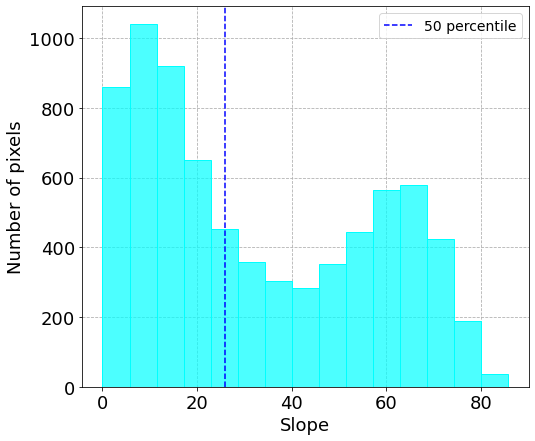

In [26]:
fig = plt.figure(figsize=(8, 7))


percentile50 = np.percentile(a = ML_database['Slope'], q = 50)
ax = sns.histplot(ML_database['Slope'], stat = 'frequency', color = 'cyan', edgecolor = 'cyan', alpha = 0.7, kde = False, bins = 15)


ax.grid(linestyle='dashed')
ax.set_axisbelow(True)

plt.xlabel('Slope',fontsize=18)
plt.ylabel('Number of pixels',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)


ax.axvline(x = percentile50, color = 'b', label = '50 percentile',linestyle = 'dashed')
#ax.axvline(x = 45, color = 'k', label = '45', linestyle = 'dashed')
ax.legend(fontsize=14)

plt.title('')
plt.savefig('Histogram_slope_ML.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

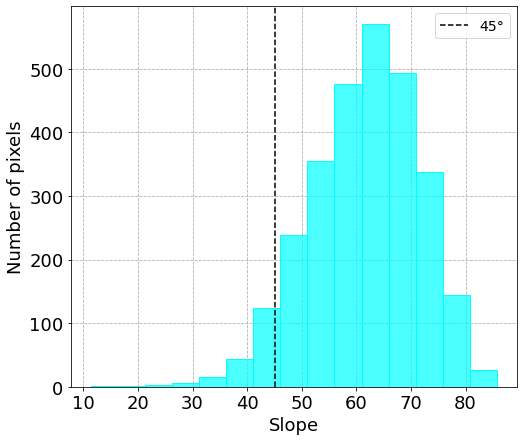

In [27]:
fig = plt.figure(figsize=(8, 7))
    
ax = sns.histplot(df_rockfall_Laerdal_Aurland['Slope'], stat = 'frequency', color = 'cyan', edgecolor = 'cyan', alpha = 0.7, kde = False, bins = 15)


ax.grid(linestyle='dashed')
ax.set_axisbelow(True)

plt.xlabel('Slope',fontsize=18)
plt.ylabel('Number of pixels',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.axvline(x = 45, color = 'k', label = '45°', linestyle = 'dashed')
ax.legend(fontsize=14)

plt.title('')
plt.savefig('Histogram_slope_rockfall_pixels_ML.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)
    
train_X = X_train[~np.isnan(X_train).any(axis=1)]
train_y = y_train[~np.isnan(X_train).any(axis=1)]
test_X = X_test[~np.isnan(X_test).any(axis=1)]
test_y = y_test[~np.isnan(X_test).any(axis=1)]

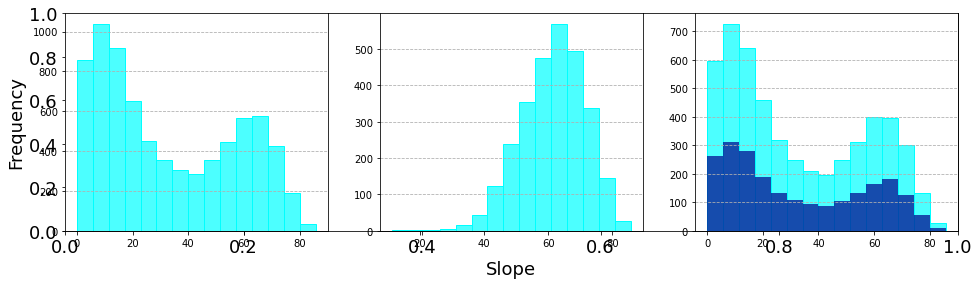

In [30]:
fig = plt.figure(figsize = [16,4])

plt.xlabel("Slope",fontsize=18)
plt.ylabel("Frequency",fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax1 = fig.add_subplot(131)
h1 = sns.histplot(ML_database['Slope'], stat = 'frequency', color = 'cyan', edgecolor = 'cyan', alpha = 0.7, kde = False, bins = 15)
h1.set(xlabel=None)
h1.set(ylabel=None)
ax1.grid(axis='y',linestyle = 'dashed')

ax2 =  fig.add_subplot(132)
h2 = sns.histplot(df_rockfall_Laerdal_Aurland['Slope'], stat = 'frequency', color = 'cyan', edgecolor = 'cyan', alpha = 0.7, kde = False, bins = 15)
h2.set(xlabel=None)
h2.set(ylabel=None)
ax2.grid(axis='y',linestyle = 'dashed')


ax3 =  fig.add_subplot(133)

h3 = sns.histplot(train_X['Slope'], stat = 'frequency', color = 'cyan', edgecolor = 'cyan', alpha = 0.7, kde = False, bins = 15,label = 'Calibration')
h4 = sns.histplot(test_X['Slope'], stat = 'frequency', color = 'darkblue',edgecolor = 'none', alpha = 0.7, kde = False, bins = 15, label = 'Validation')
h3.set(xlabel=None)
h3.set(ylabel=None)
ax3.grid(axis='y', linestyle = 'dashed')

#plt.savefig('histogram_rf_frequency.png')

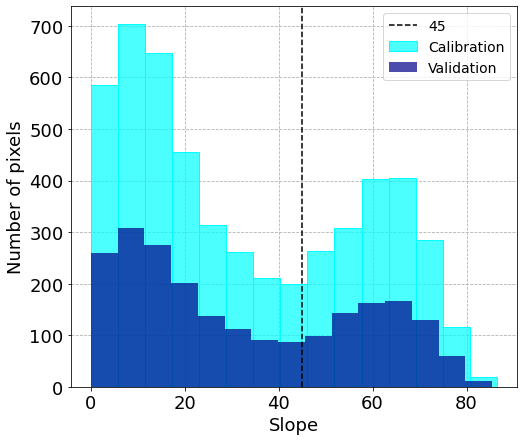

In [32]:
fig = plt.figure(figsize=(8, 7))
    
ax = sns.histplot(train_X['Slope'], stat = 'frequency', color = 'cyan', edgecolor = 'cyan', alpha = 0.7, kde = False, bins = 15,label = 'Calibration')
ax = sns.histplot(test_X['Slope'], stat = 'frequency', color = 'darkblue',edgecolor = 'none', alpha = 0.7, kde = False, bins = 15, label = 'Validation')


ax.grid(linestyle='dashed')
ax.set_axisbelow(True)

plt.xlabel('Slope',fontsize=18)
plt.ylabel('Number of pixels',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.axvline(x = 45, color = 'k', label = '45', linestyle = 'dashed')
ax.legend(fontsize=14)

plt.title('')
plt.savefig('Histogram_slope_calibration_and_validation.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

In [31]:
X_train.to_excel("ML_training_features.xlsx")
X_test.to_excel("ML_validation_features.xlsx")

y_train.to_excel("ML_training_target.xlsx")
y_test.to_excel("ML_validation_target.xlsx")